Mean Squared Error: 0.17504343244053217


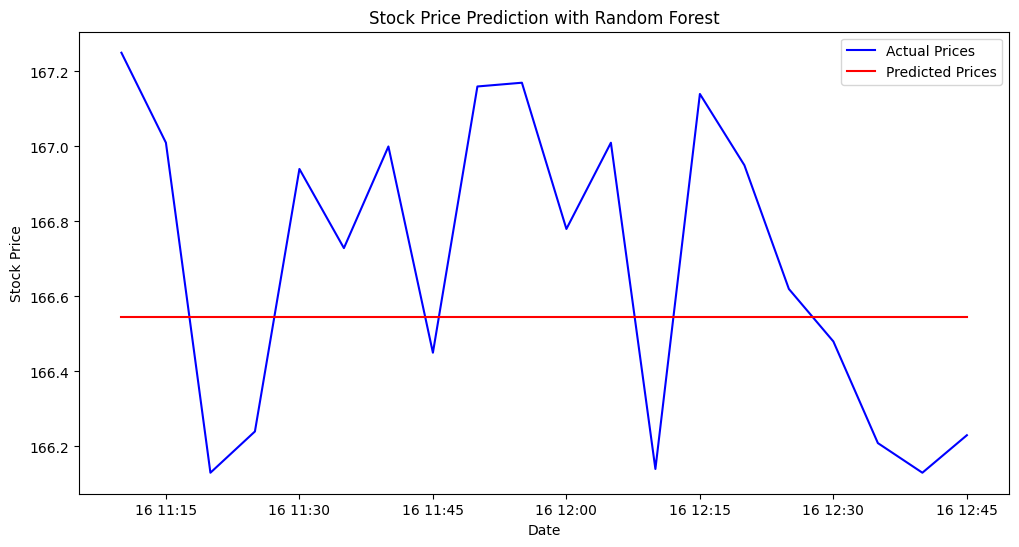

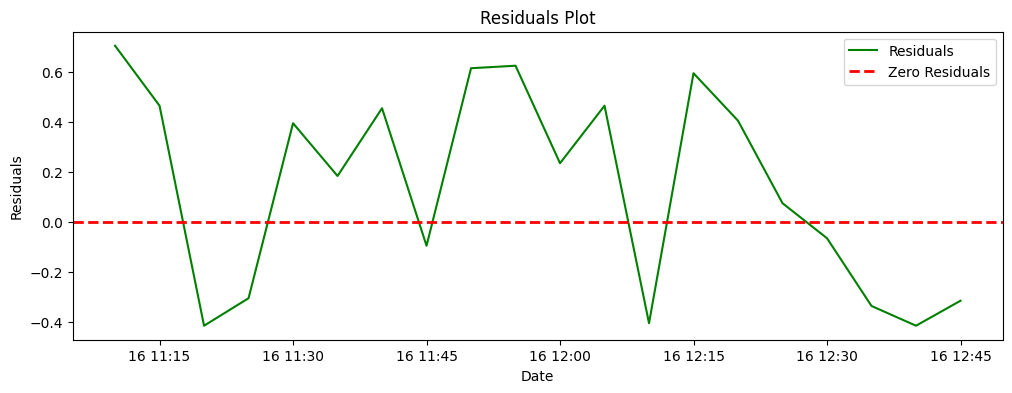

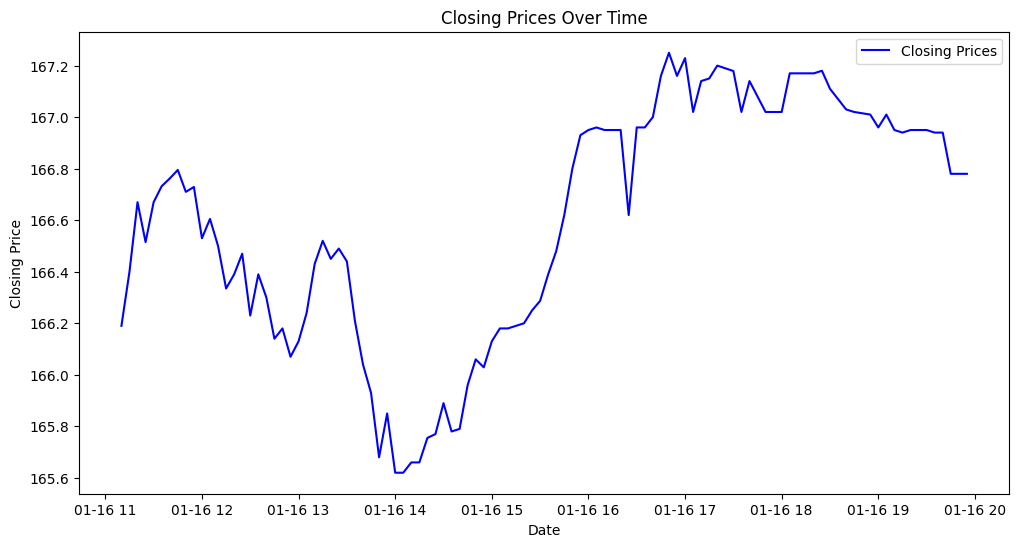

In [6]:
# Импорт необходимых библиотек
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Загрузка данных (замените 'your_data.csv' на путь к вашему файлу данных)
data = pd.read_csv('/content/intraday_5min_IBM.csv')
data
# Предварительная обработка данных
# (здесь предполагается, что у вас есть столбец 'Date' с временными метками и 'Close' с ценами закрытия)
data['Date'] = pd.to_datetime(data['timestamp'])
data.set_index('Date', inplace=True)

# Создание признаков
data['Day'] = data.index.day
data['Month'] = data.index.month
data['Year'] = data.index.year

# Определение целевой переменной и признаков
target_column = 'close'
features = ['Day', 'Month', 'Year']  # Признаки, которые будут использоваться для предсказания

X = data[features]
y = data[target_column]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели случайного леса
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Предсказание на тестовых данных
predictions = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

data
# Визуализация предсказаний
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Prices', color='blue')
plt.plot(data.index[-len(y_test):], predictions, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction with Random Forest')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# График остатков
residuals = y_test - predictions
plt.figure(figsize=(12, 4))
plt.plot(data.index[-len(y_test):], residuals, label='Residuals', color='green')
plt.axhline(0, linestyle='--', color='red', linewidth=2, label='Zero Residuals')
plt.title('Residuals Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()



# График динамики цен закрытия со временем
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['close'], label='Closing Prices', color='blue')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [10]:
data




,timestamp,open,high,low,close,volume,Day,Month,Year
Date,,,,,,,,,
2024-01-16 19:55:00,2024-01-16 19:55:00,166.930,166.93,166.780,166.780,50,16,1,2024
2024-01-16 19:50:00,2024-01-16 19:50:00,166.940,166.95,166.700,166.780,61,16,1,2024
2024-01-16 19:45:00,2024-01-16 19:45:00,166.750,166.94,166.750,166.780,18,16,1,2024
2024-01-16 19:40:00,2024-01-16 19:40:00,166.750,166.94,166.750,166.940,20,16,1,2024
2024-01-16 19:35:00,2024-01-16 19:35:00,166.890,166.94,166.700,166.940,513,16,1,2024
...,...,...,...,...,...,...,...,...,...
2024-01-16 11:30:00,2024-01-16 11:30:00,166.530,166.67,166.500,166.670,27199,16,1,2024
2024-01-16 11:25:00,2024-01-16 11:25:00,166.670,166.75,166.500,166.515,36708,16,1,2024
2024-01-16 11:20:00,2024-01-16 11:20:00,166.420,166.70,166.415,166.670,25041,16,1,2024
